# Pandas and data sources

### drinks = pd.read_csv('http://bit.ly/drinksbycountry')
### movies = pd.read_csv('http://bit.ly/imdbratings')
### train = pd.read_csv('http://bit.ly/kaggletrain')
### ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

In [3]:
import pandas as pd
import numpy as np

In [4]:
names = ['john','anne','mary']
emails = ['john@mit.edu','anne@mit.edu','mary@mit.edu']
courses = [1,4,6]
contacts = {'Name': names,
            'Email': emails,
            'Course': courses}
df = pd.DataFrame(data=contacts, index = [1, 2, 3])
df.values

array([['john', 'john@mit.edu', 1],
       ['anne', 'anne@mit.edu', 4],
       ['mary', 'mary@mit.edu', 6]], dtype=object)

## Understanding Python and Pandas DataFrame 

In [8]:
contact = {'Name':'john','Email':'john@mit.edu','Course':1}
names = np.array(['john','anne','mary'])
emails = ['john@mit.edu','anne@mit.edu','mary@mit.edu']
courses = [1, 3, 6]
contacts = {'Name': names,
            'Email': emails,
            'Course': courses}
df = pd.DataFrame(index = range(1,4))
print(df)
df['Name'] = names
df['Email'] = emails
df['Course'] = courses


df2 = pd.DataFrame(data=contacts)
df2

Empty DataFrame
Columns: []
Index: [1, 2, 3]


,Name,Email,Course
0,john,john@mit.edu,1
1,anne,anne@mit.edu,3
2,mary,mary@mit.edu,6


## Slice and Dice Rows and Columns
loc and iloc  pick out a row
.loc refers to the label index.
.iloc refers to the positional index.

In [9]:
contacts = df
contacts
df.loc[1]
df.iloc[1:4]


,Name,Email,Course
2,anne,anne@mit.edu,3
3,mary,mary@mit.edu,6


In [10]:
slice = df[df['Course'] > 1]
slice

,Name,Email,Course
2,anne,anne@mit.edu,3
3,mary,mary@mit.edu,6


##  Pick out a column as Pandas Series

In [11]:
courses = df['Course']

In [12]:
df['Course'].mean()

3.3333333333333335

## Operations on Pandas Series

In [13]:
df['Price'] = df['Course']*10
df

,Name,Email,Course,Price
1,john,john@mit.edu,1,10
2,anne,anne@mit.edu,3,30
3,mary,mary@mit.edu,6,60


In [14]:
df.index = ['A','B','C']
df

,Name,Email,Course,Price
A,john,john@mit.edu,1,10
B,anne,anne@mit.edu,3,30
C,mary,mary@mit.edu,6,60


Course                          
Email anne@mit.edu john@mit.edu mary@mit.edu
Name                                        
anne           3.0          NaN          NaN
john           NaN          1.0          NaN
mary           NaN          NaN          6.0

## 

##  Stacking of Data
Sun Exposure Data

In [15]:
import pandas as pd
gt20 = [30,75.0,10, 25.0,40,100]
lt20 = [9,9.0,90,91.0,99,100]
nvr = [1,0.3,300,99.7,301,100]
ttl = [40,9.0,400,91.0,440,100]
cols = ['N','%','N','%','N','%']
idx = ['>20 Yrs','<20 Yrs','Never','Total']
multicol1 = pd.MultiIndex.from_tuples([('Non Mel Skin Cancer','Yes', 'N'),
                                       ('Non Mel Skin Cancer','Yes', '%'),
                                       ('Non Mel Skin Cancer','No', 'N'),
                                       ('Non Mel Skin Cancer','No', '%'),
                                       ('Non Mel Skin Cancer','Total', 'N'),
                                       ('Non Mel Skin Cancer','Total', '%')])
multirow1 = pd.MultiIndex.from_tuples([('Sun','>20 Yrs'), 
                                       ('Sun','<20 Yrs'),
                                       ('Sun','Never'),
                                       ('Sun','Total')],
                                         names=['Sun Exposure', 'Years' ])
df = pd.DataFrame([gt20,lt20,nvr,ttl], index = multirow1, columns = multicol1)
tup = ('Non Mel Skin Cancer','Yes', 'N')
dict = {('Non Mel Skin Cancer','Yes', 'N'):"value"}
dict[('Non Mel Skin Cancer','Yes', 'N')]
#df.loc[('Sun','Total'),[('Non Mel Skin Cancer','Yes', 'N'), ('Non Mel Skin Cancer','Total', '%')]]
df

Non Mel Skin Cancer                            
                                     Yes         No       Total     
                                       N     %    N     %     N    %
Sun Exposure Years                                                  
Sun          >20 Yrs                  30  75.0   10  25.0    40  100
             <20 Yrs                   9   9.0   90  91.0    99  100
             Never                     1   0.3  300  99.7   301  100
             Total                    40   9.0  400  91.0   440  100

## iloc and loc for picking out rows, columns and values
## and understanding the types that are returned

In [16]:
# lets use iloc
#      row  col
df.iloc[0:3,0:2]

df.iloc[[0,2],[1,3]]

# now lets use loc that uses the tuples to get data
type(df.loc[[('Sun','>20 Yrs'),('Sun','Never'),('Sun','Total')],
    ('Non Mel Skin Cancer','Yes', 'N')])

pandas.core.series.Series

In [17]:
import pandas as pd
gt20 = [30,75.0,10, 25.0,40,100]
lt20 = [9,9.0,90,91.0,99,100]
nvr = [1,0.3,300,99.7,301,100]
ttl = [40,9.0,400,91.0,440,100]
cols = ['N','%','N','%','N','%']
idx = ['>20 Yrs','<20 Yrs','Never','Total']
multicol1 = pd.MultiIndex.from_tuples([('Non Mel Skin Cancer','Yes', 'N'),
                                       ('Non Mel Skin Cancer','Yes', '%'),
                                      ('Non Mel Skin Cancer','No', 'N'),
                                      ('Non Mel Skin Cancer','No', '%'),
                                      ('Non Mel Skin Cancer','Total', 'N'),
                                       ('Non Mel Skin Cancer','Total', '%')])
multirow1 = pd.MultiIndex.from_tuples([('Sun Exposure','>20 Yrs'), ('Sun Exposure','<20 Yrs'),('Sun Exposure','Never'),('Sun Exposure','Total')],names=['first', 'second']) 
df = pd.DataFrame([gt20,lt20,nvr,ttl], index = multirow1, columns = multicol1)

df

Non Mel Skin Cancer                            
                                     Yes         No       Total     
                                       N     %    N     %     N    %
first        second                                                 
Sun Exposure >20 Yrs                  30  75.0   10  25.0    40  100
             <20 Yrs                   9   9.0   90  91.0    99  100
             Never                     1   0.3  300  99.7   301  100
             Total                    40   9.0  400  91.0   440  100

In [18]:
import numpy as np
a = np.array([[1,2],[3,4]])
a.T

array([[1, 3],
       [2, 4]])

## Generating data from normal distribution

In [19]:
calories = np.round(np.random.normal(50,10,100), decimals = 0)
calories

array([30., 29., 41., 45., 47., 26., 44., 63., 47., 47., 63., 57., 53.,
       62., 49., 45., 45., 47., 51., 41., 43., 39., 51., 47., 53., 51.,
       50., 59., 50., 48., 57., 42., 30., 49., 44., 50., 57., 44., 30.,
       49., 49., 66., 45., 47., 42., 48., 28., 75., 45., 36., 49., 49.,
       23., 53., 65., 45., 52., 63., 31., 54., 42., 42., 48., 56., 47.,
       59., 43., 54., 40., 62., 43., 46., 65., 59., 45., 69., 59., 48.,
       63., 47., 54., 58., 50., 57., 51., 42., 58., 50., 41., 57., 56.,
       44., 52., 54., 57., 53., 52., 51., 62., 51.])

In [35]:
# Generate Dates using pd.date_range
cols = list('ABCD')
myArr = np.random.randint(0,100,size=(5,4))
indx = pd.date_range(start='1/1/2020', freq='D', periods=5)
indx

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df = pd.DataFrame(data=myArr, index=indx, columns=['Region','Rep','Items','Total'])
df


In [ ]:
myArr = np.random.randint(0,100,size=(9, 4))
indx = pd.date_range(start='1/1/2019',freq='D', periods=9)
cols = list('ABCD')

In [ ]:
df = pd.DataFrame(data = myArr, index=indx, columns=['State','Rep','Items','Total'])
df['Rep'] = ('Anne','Fred','Mary')*3
df

In [6]:
import numpy as np
import pandas as pd
dates = pd.dates 
df = pd.DataFrame(index = indx)
df['values'] = range(9,0,-1)
a = []
for i in range(1,10):
    a.append(i*3)
df['A'] = a
df

,values,A
1,9,3
2,8,6
3,7,9
4,6,12
5,5,15
6,4,18
7,3,21
8,2,24
9,1,27


In [368]:
group = list('AAABBBCCC')
dates = ('1/1/2020', '1/2/2020', '1/3/2020', '1/4/2020','1/5/2020','1/6/2020',
        '1/7/2020','1/8/2020','1/9/2020')
df1 = pd.DataFrame({'dates': dates,
                'agent': ('anne','betty','fred')*3,
                'product':group,
                'sold':range(1,10)})
df1.dates = pd.to_datetime(df1.dates)
df2 = pd.pivot_table(data = df1, index = ['agent','dates'], values = ['sold'])
df1

,dates,agent,product,sold
0,2020-01-01,anne,A,1
1,2020-01-02,betty,A,2
2,2020-01-03,fred,A,3
3,2020-01-04,anne,B,4
4,2020-01-05,betty,B,5
5,2020-01-06,fred,B,6
6,2020-01-07,anne,C,7
7,2020-01-08,betty,C,8
8,2020-01-09,fred,C,9


In [40]:
import pandas as pd
import numpy as np
import datetime
indx = ('1/2/2020','1/3/2020','1/4/2020')*3     # notice the times 3
group = list('AAABBBCCC')
df = pd.DataFrame({'dates': indx,
                'group':group,
                'values':range(1,10)})
df.dates = pd.to_datetime(df.dates)
df

,dates,group,values
0,2020-01-02,A,1
1,2020-01-03,A,2
2,2020-01-04,A,3
3,2020-01-02,B,4
4,2020-01-03,B,5
5,2020-01-04,B,6
6,2020-01-02,C,7
7,2020-01-03,C,8
8,2020-01-04,C,9


In [198]:
df.pivot_table(index='dates', columns = 'group', values='values')


group,A,B,C
dates,,,
2020-01-02,1,4,7
2020-01-03,2,5,8
2020-01-04,3,6,9


In [499]:
table = {"Item": ['Item0', 'Item0', 'Item0', 'Item1'],
    'CType':['Gold', 'Bronze', 'Gold', 'Silver'],
    'USD':[1, 2, 3, 4],
    'EU': [4, 3, 2, 1]}
d = pd.DataFrame(table)
d

,Item,CType,USD,EU
0,Item0,Gold,1,4
1,Item0,Bronze,2,3
2,Item0,Gold,3,2
3,Item1,Silver,4,1


In [507]:
pv = d.pivot_table(index='Item', columns='CType', aggfunc=sum)
pv

EU                USD            
CType Bronze Gold Silver Bronze Gold Silver
Item                                       
Item0    3.0  6.0    NaN    2.0  4.0    NaN
Item1    NaN  NaN    1.0    NaN  NaN    4.0

## Generating Samples using Numpy

In [457]:
import numpy as np
from scipy.stats import norm
N = 5
fruits = np.random.choice(['apple','pear','plum'], N)
colors = np.random.choice(['green','yellow','red','orange','brown'], N)
tastes = np.random.choice(['sour','bitter','sweet'], N)
sizes = np.random.choice(['small','big'], N)
calories = np.round(np.random.normal(150,10,N), decimals = 0)
region = np.random.choice(['north','south'], N)
cost = np.round(np.random.normal(20,10,N), decimals = 0)
units = np.random.normal(200,10,N).astype(int)
period = pd.date_range('20130101', periods=3, freq='M')
dates = np.random.choice(period, N)
dict = {'fruits':fruits, 'colors':colors, 'tastes':tastes,'sizes':sizes, 
        'calories':calories, 'region':region, 'cost':cost, 'units':units}
df = pd.DataFrame(dict)
df

,fruits,colors,tastes,sizes,calories,region,cost,units
0,pear,green,sour,big,140.0,north,37.0,192
1,plum,green,sweet,big,154.0,south,15.0,210
2,pear,brown,bitter,big,150.0,south,12.0,199
3,plum,orange,sour,big,142.0,south,26.0,197
4,pear,orange,sweet,small,139.0,north,20.0,204


In [484]:
pv = df.pivot_table(index = ['region','fruits'], columns = ['tastes','sizes'], 
                    values=['units'], aggfunc = sum)
pv.unstack()

units                                            
tastes bitter        sour        sweet                   
sizes     big         big          big         small     
fruits   pear plum   pear   plum  pear   plum   pear plum
region                                                   
north     NaN  NaN  192.0    NaN   NaN    NaN  204.0  NaN
south   199.0  NaN    NaN  197.0   NaN  210.0    NaN  NaN

 ## Exercise use this data to recreate my pivot and pivot_tables
 

In [32]:
fruits = ['apple', 'pear', 'pear', 'apple', 'pear']
colors = ['red', 'yellow', 'brown', 'brown', 'green']
tastes = ['sour','sour', 'sweet','sweet','bitter']
sizes = ['small','big','big','big', 'small']
calories = [155,130,129,143,148]
region = ['north', 'north', 'south', 'north', 'north']
cost = [35,27,40,8,16]
units = [210,197,187,208,201]
df = pd.DataFrame(index=range(0,5))
df['fruits'] = fruits             # Complete the DataTable
df

,fruits
0,apple
1,pear
2,pear
3,apple
4,pear


In [26]:
piv = df.pivot_table(index=['region','fruits'],columns=calories,values=units,
                    aggfunc = sum)
piv







KeyError: 210

In [25]:
df2 = piv.pivot(index=['Name'],columns=['Email'])
df2

NameError: name 'piv' is not defined

In [467]:
pv.stack()

units
region fruits sizes       
north  pear   big    192.0
              small  204.0
south  pear   big    199.0
       plum   big    407.0

## Pivot_Table Explained

In [270]:
period = pd.date_range('20130101', periods=3, freq='M')
dates = np.random.choice(period, 9)
region = ['North','South','South']*3
style = ['Tee','Golf','Fancy']*3
gender = ['Girl','Boy','Girl','Girl','Boy','Boy','Girl','Boy','Girl']
columns = ['Style','Gender','ShipDate','Units','Price','Region']
values = range(1,10)
df=pd.DataFrame(index = range(1,10), columns=columns)
df['Style'] = style
df['Gender'] = gender
df['ShipDate'] = dates
df['Units'] = np.random.randint(1,20, size=9)
df['Price'] = np.random.uniform(20,30,size=9)
df['Region'] = region
df['Total'] = np.multiply(df['Units'],df['Price'])
df

,Style,Gender,ShipDate,Units,Price,Region,Total
1,Tee,Girl,2013-03-31,12,24.318029,North,291.816354
2,Golf,Boy,2013-02-28,19,26.908958,South,511.270193
3,Fancy,Girl,2013-01-31,18,25.577032,South,460.386582
4,Tee,Girl,2013-01-31,4,24.431483,North,97.725931
5,Golf,Boy,2013-01-31,16,28.555318,South,456.885087
6,Fancy,Boy,2013-02-28,18,23.748531,South,427.473563
7,Tee,Girl,2013-02-28,17,21.848335,North,371.421703
8,Golf,Boy,2013-03-31,4,26.297559,South,105.190235
9,Fancy,Girl,2013-01-31,2,26.512295,South,53.024590


In [ ]:
#pivot table

In [271]:

pt = pd.pivot_table(data=df, index=['Region','Style'], columns=['ShipDate'], values='Units')
pt

ShipDate      2013-01-31  2013-02-28  2013-03-31
Region Style                                    
North  Tee           4.0        17.0        12.0
South  Fancy        10.0        18.0         NaN
       Golf         16.0        19.0         4.0

In [272]:
df['Total'] = df['Price']*df['Units']
pt = pd.pivot_table(data=df, index =['Region','Gender'], columns='Style', values='Total',aggfunc=sum)
pt

Style               Fancy         Golf         Tee
Region Gender                                     
North  Girl           NaN          NaN  760.963988
South  Boy     427.473563  1073.345516         NaN
       Girl    513.411171          NaN         NaN

In [273]:

df

,Style,Gender,ShipDate,Units,Price,Region,Total
1,Tee,Girl,2013-03-31,12,24.318029,North,291.816354
2,Golf,Boy,2013-02-28,19,26.908958,South,511.270193
3,Fancy,Girl,2013-01-31,18,25.577032,South,460.386582
4,Tee,Girl,2013-01-31,4,24.431483,North,97.725931
5,Golf,Boy,2013-01-31,16,28.555318,South,456.885087
6,Fancy,Boy,2013-02-28,18,23.748531,South,427.473563
7,Tee,Girl,2013-02-28,17,21.848335,North,371.421703
8,Golf,Boy,2013-03-31,4,26.297559,South,105.190235
9,Fancy,Girl,2013-01-31,2,26.512295,South,53.024590


In [ ]:
# using loc and iloc to slice data
import matplotlib.pyplot as plt
import numpy as np 
array = df['D'].to_numpy()
plt.figure(figsize=(8,6))
plt.hist([1,2.2,3,5,3,2], alpha=0.4, density=True)
plt.show()

In [ ]:
df.loc[:,['A','B']]


In [ ]:
df.loc['2013-01-01',['D']]

In [ ]:
df.loc[:,['D']]

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4), columns=['A','B','C','D'])
df

In [ ]:
df.loc[2:5,['A','D']]

In [ ]:
df.iloc[2:5,[1,3]]

In [ ]:
df

In [ ]:
df1 = pd.pivot_table(data=df, index = ['B'])
df1

## DrinksByCountry Pandas Groupby 
### In Class = How many countries in Asia drink over 100 wine_servings?

In [53]:
# read from link and write locally in JSON
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
# replace column heading total_litres with total
drinks.columns = ['country','beer_servings',
                  'spirit_servings','wine_servings','total','continent']
drinks.to_json('drinksbycountry.json')  # with column headings modified
drinks

,country,beer_servings,spirit_servings,wine_servings,total,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [54]:
drinks[(drinks['continent'] == 'Asia')&(drinks['wine_servings'] > 100)]

,country,beer_servings,spirit_servings,wine_servings,total,continent
92,Laos,62,0,123,6.2,Asia


In [49]:
df = pd.read_json('drinksbycountry.json')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [257]:
pt = pd.pivot_table(data=df, index = ['continent','country'],  values='total', aggfunc=['mean'])
pt

mean
                           total
continent     country           
Africa        Algeria        0.7
              Angola         5.9
              Benin          1.1
              Botswana       5.4
              Burkina Faso   4.3
...                          ...
South America Paraguay       7.3
              Peru           6.1
              Suriname       5.6
              Uruguay        6.6
              Venezuela      7.7

[193 rows x 1 columns]

## groupby continent 

<AxesSubplot:xlabel='continent'>

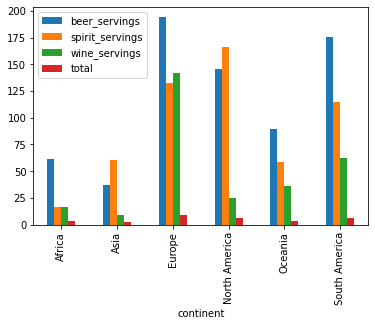

In [186]:

drinks.groupby('continent').mean().plot.bar()

,min,mean,max
,total,total,total
continent,,,
Africa,0.7,3.30,5.9
Asia,0.0,0.00,0.0
Europe,4.9,8.65,12.4


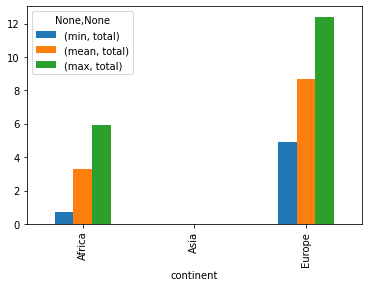

In [157]:

df.columns = ['country','beer_servings',
                  'spirit_servings','wine_servings','total','continent']

df1 = pd.pivot_table(df, index=['continent','country'], 
                     values=['total'], 
                     aggfunc=['mean','sum','max'])

df3=df.head()
df4= pd.pivot_table(df3, index=['continent'], values=['total'], aggfunc=['min','mean','max'])
df4.plot(kind='bar')
df4

In [15]:
bc = drinks.groupby('continent').mean()
bc

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


<AxesSubplot:>

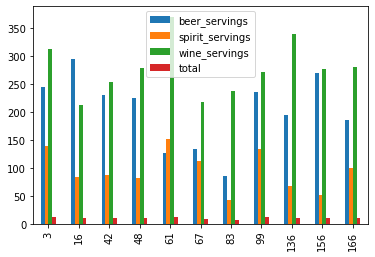

In [180]:
df[(df.wine_servings >= 200) & (df.continent == 'Europe')].plot(kind='bar')

In [175]:
df[(df.wine_servings >= 20) & (df.continent == 'Asia')]

,country,beer_servings,spirit_servings,wine_servings,total,continent
92,Laos,62,0,123,6.2,Asia
94,Lebanon,20,55,31,1.9,Asia
141,Russian Federation,247,326,73,11.5,Asia
177,Turkmenistan,19,71,32,2.2,Asia


In [50]:
bd = pd.pivot_table(data=drinks, index = ['continent','country'])
bd

beer_servings  spirit_servings  total  \
continent     country                                               
Africa        Algeria                  25                0    0.7   
              Angola                  217               57    5.9   
              Benin                    34                4    1.1   
              Botswana                173               35    5.4   
              Burkina Faso             25                7    4.3   
...                                   ...              ...    ...   
South America Paraguay                213              117    7.3   
              Peru                    163              160    6.1   
              Suriname                128              178    5.6   
              Uruguay                 115               35    6.6   
              Venezuela               333              100    7.7   

                            wine_servings  
continent     country                      
Africa        Algeria                  14  
              Angola                   45  
              Benin                    13  
              Botswana                 35  
              Burkina Faso              7  
...                                   ...  
South America Paraguay                 74  
              Peru                     21  
              Suriname                  7  
              Uruguay                 220  
              Venezuela                 3  

[193 rows x 4 columns]

pandas.core.frame.DataFrame

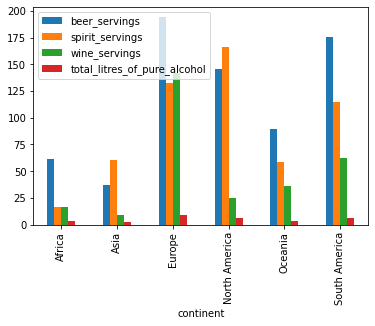

In [71]:
drinks.groupby("continent").mean().plot(kind = 'bar')
type(drinks.groupby("continent").mean())

## Pandas Series - Handling Lists and Arrays

In [46]:
import pandas as pd
import numpy as np
import matplotlib as plt

myArray = np.array([[1,2],[2,3],[3,8],[4,2]])
myArray = {'Course':[1,2,3,4], 'Dept':[2,3,8,2]}
#mySeries = pd.Series(myArray)
myData = pd.DataFrame(myArray,  index=range(1,5))
myData

,Course,Dept
1,1,2
2,2,3
3,3,8
4,4,2


## writing to json file

In [332]:
myData.to_json( orient = 'index')

'{"3":{"Course":1},"4":{"Course":2},"5":{"Course":3},"6":{"Course":3}}'

In [287]:
data = pd.read_json(_, orient='index')

## datetime - epoch is from Unix time 0 (midnight 1/1/1970)

## What day of the week was 1/1/1970

In [302]:
myArray = np.array([1,2,3,4,5,6,7])
mySeries = pd.Series(myArray)
mySeries.index = pd.date_range(start='1/1/1970', periods=7)
mySeries.index.dayofweek

Int64Index([3, 4, 5, 6, 0, 1, 2], dtype='int64')

## PS2 - UFO Data - Handling Time, Day of Week etc
### What day of the week has the most sightings?
### On the day with most sightings plot a histogram the time of day the sightings occured
### Do the same for the day with the 2nd most sightings
### For extra credit - Are there any deductions or patterns you see in the data? Justify with plots or data.

In [7]:
import pandas as pd
import numpy as np
import matplotlib as plt
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])
ufo


,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00
